<img src = excelrlogo.png/>

### ASSIGNMENT-15 -- RANDOM FOREST

#### PROBLEM STATEMENT -- Company_Data

#### LIBRARIES

In [1]:
import pandas as pd
import numpy as np

#### READ/LOAD THE DATASET

In [2]:
Company_Data_Random = pd.read_csv("Company_Data_Random.csv")
Company_Data_Random

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


#### EDA/ GETTING INFORMATION OF DATASET

In [3]:
Company_Data_Random.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
Company_Data_Random.shape

(400, 11)

In [5]:
Company_Data_Random.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [6]:
Company_Data_Random.describe

<bound method NDFrame.describe of      Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     

In [7]:
Company_Data_Random.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


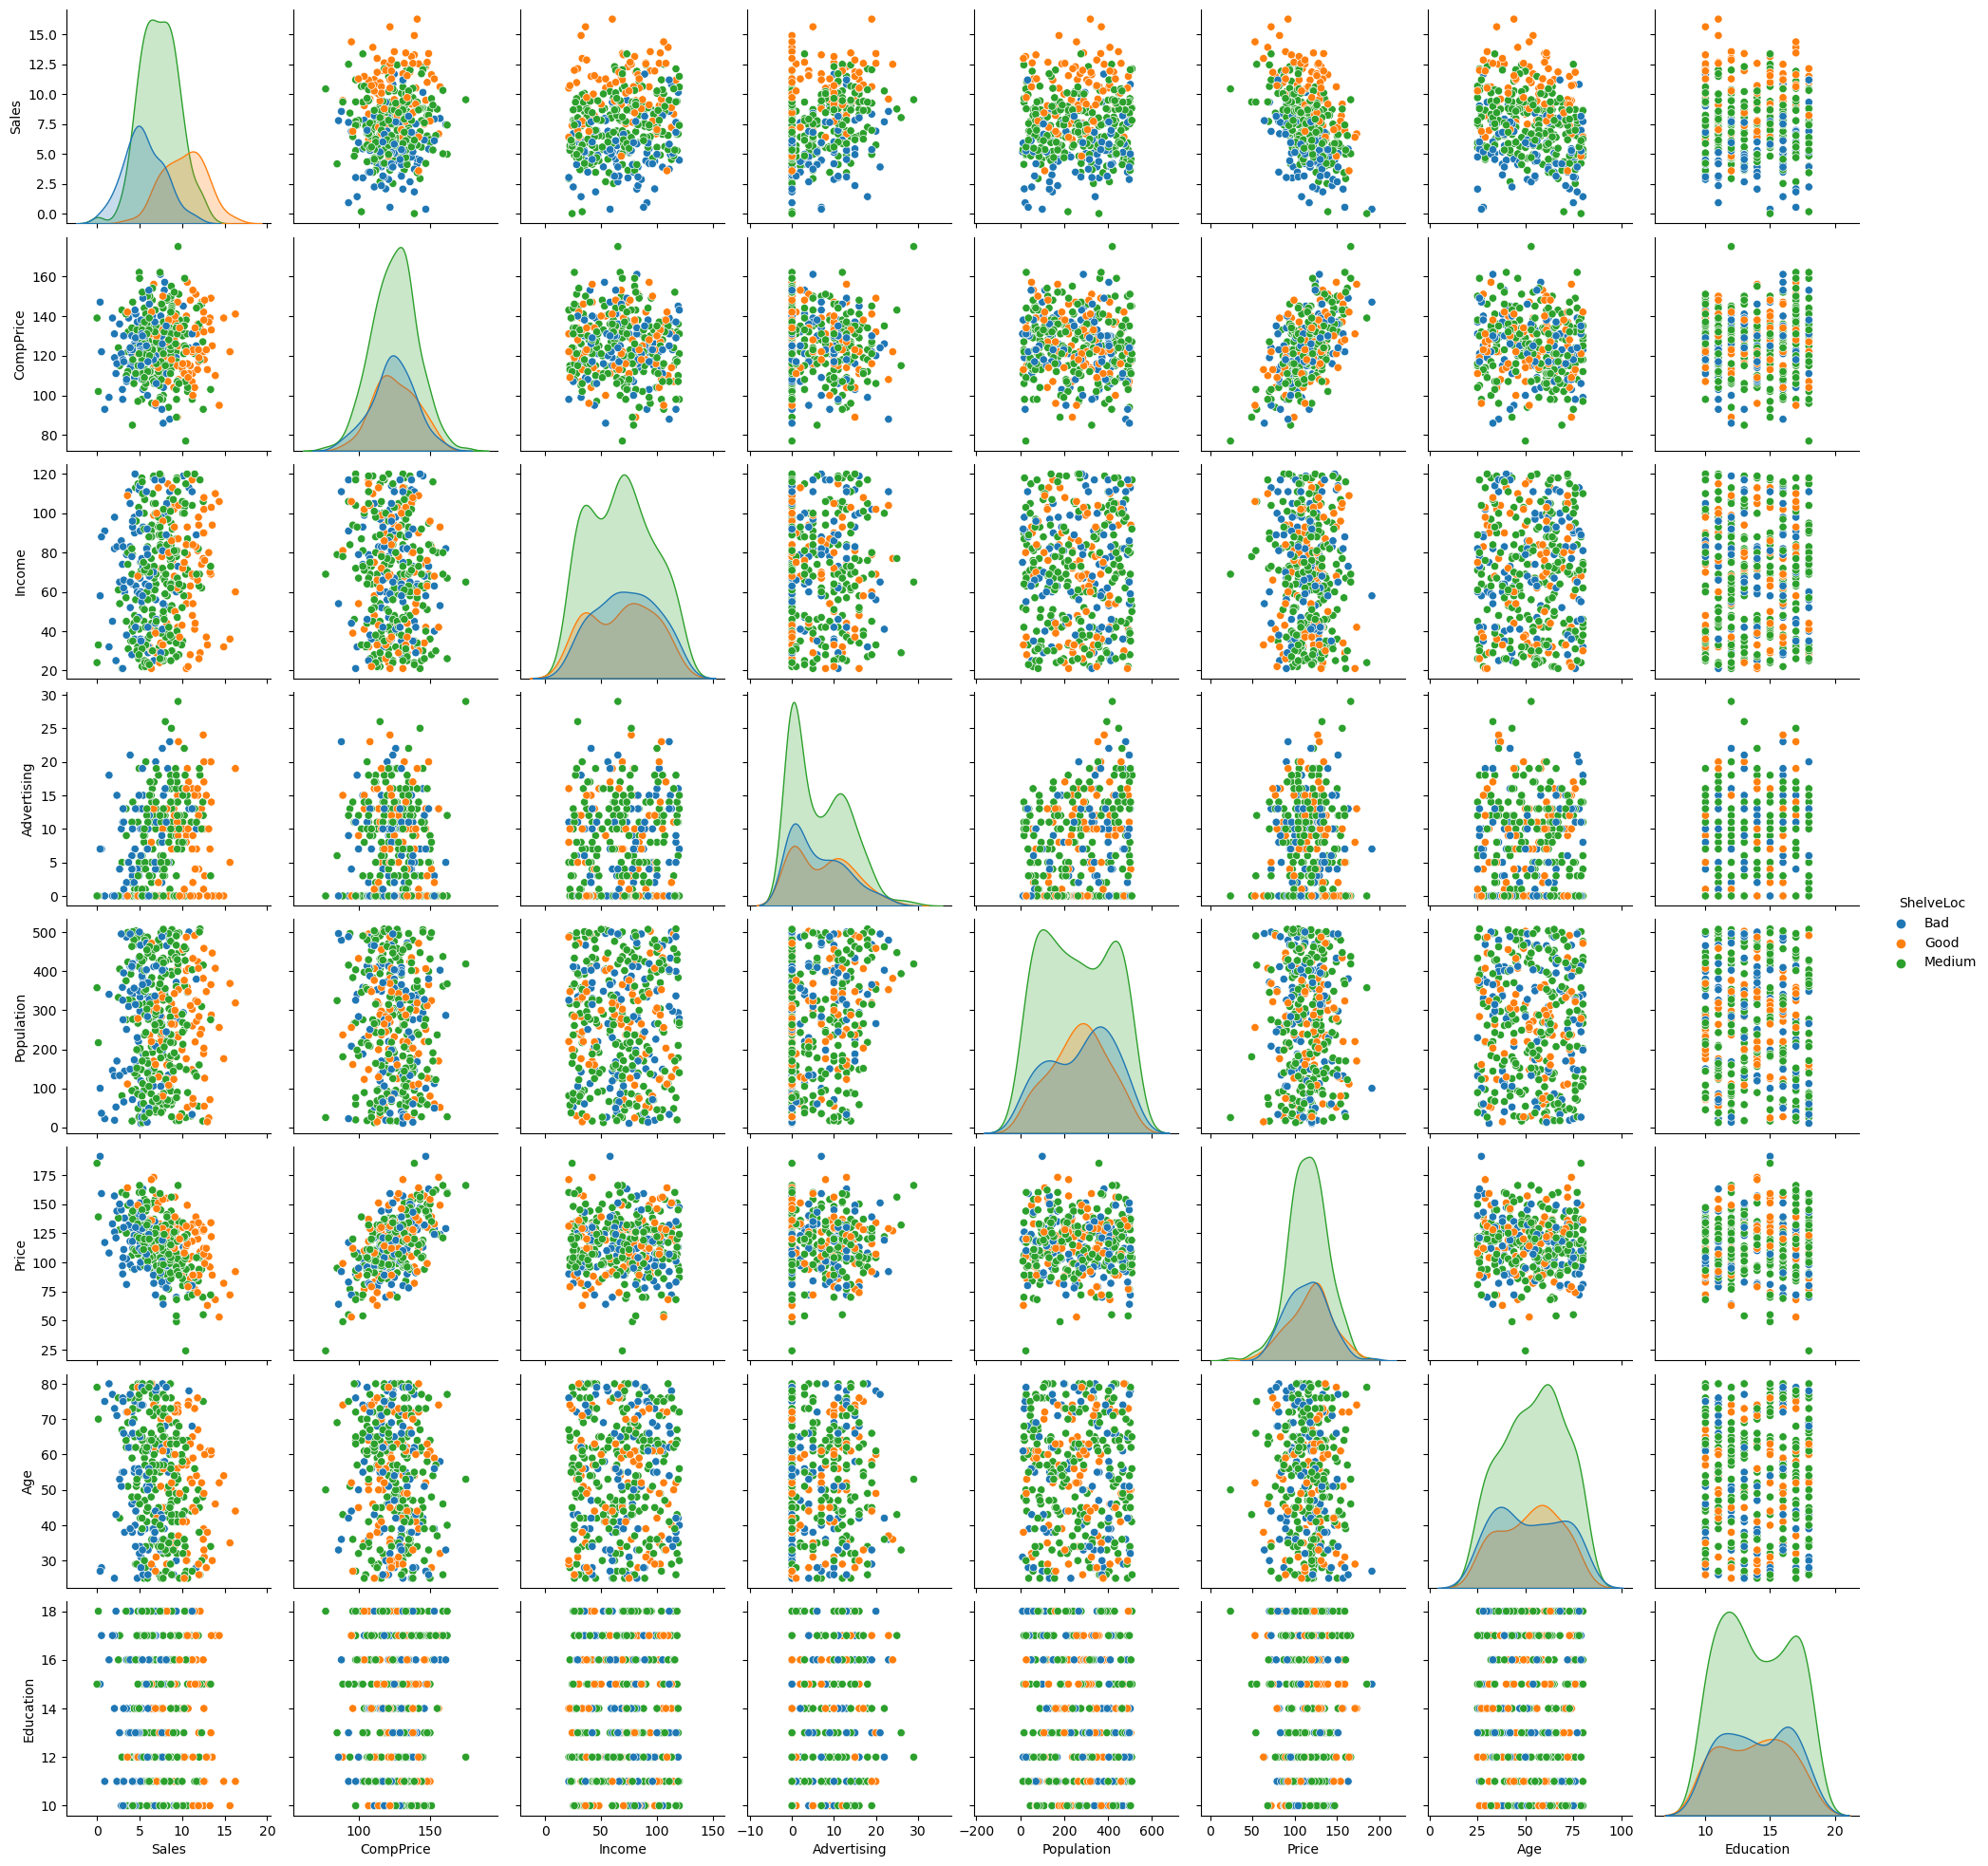

In [8]:
import seaborn as sns
sns.pairplot(data=Company_Data_Random, hue = 'ShelveLoc')

#### Creating dummy vairables dropping first dummy variable

In [9]:
Company_Data_Random_Dum = pd.get_dummies(Company_Data_Random,columns=['Urban','US'], drop_first=True)
Company_Data_Random_Dum

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,Bad,42,17,1,1
1,11.22,111,48,16,260,83,Good,65,10,1,1
2,10.06,113,35,10,269,80,Medium,59,12,1,1
3,7.40,117,100,4,466,97,Medium,55,14,1,1
4,4.15,141,64,3,340,128,Bad,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1,1
396,6.14,139,23,3,37,120,Medium,55,11,0,1
397,7.41,162,26,12,368,159,Medium,40,18,1,1
398,5.94,100,79,7,284,95,Bad,50,12,1,1


In [10]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
Company_Data_Random_Dum['ShelveLoc']=Company_Data_Random_Dum['ShelveLoc'].map({'Good':1,'Medium':2,'Bad':3})
Company_Data_Random_Dum

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,3,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,3,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1,33,14,1,1
396,6.14,139,23,3,37,120,2,55,11,0,1
397,7.41,162,26,12,368,159,2,40,18,1,1
398,5.94,100,79,7,284,95,3,50,12,1,1


In [11]:
x = Company_Data_Random_Dum.iloc[:,0:6]
y = Company_Data_Random_Dum['ShelveLoc']
x

,Sales,CompPrice,Income,Advertising,Population,Price
0,9.50,138,73,11,276,120
1,11.22,111,48,16,260,83
2,10.06,113,35,10,269,80
3,7.40,117,100,4,466,97
4,4.15,141,64,3,340,128
...,...,...,...,...,...,...
395,12.57,138,108,17,203,128
396,6.14,139,23,3,37,120
397,7.41,162,26,12,368,159
398,5.94,100,79,7,284,95


In [12]:
y

0      3
1      1
2      2
3      2
4      3
      ..
395    1
396    2
397    2
398    3
399    1
Name: ShelveLoc, Length: 400, dtype: int64

In [13]:
Company_Data_Random_Dum['ShelveLoc'].unique()

array([3, 1, 2], dtype=int64)

In [14]:
Company_Data_Random_Dum.ShelveLoc.value_counts()

2    219
3     96
1     85
Name: ShelveLoc, dtype: int64

In [15]:
colnames = list(Company_Data_Random_Dum.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban_Yes',
 'US_Yes']

#### Labels are the values we want to predict

In [16]:
labels = np.array(Company_Data_Random_Dum['Income'])

In [17]:
Company_Data_Random = Company_Data_Random_Dum.drop('Income', axis = 1)

In [18]:
feature_list = list(Company_Data_Random_Dum.columns)

In [19]:
Company_Data_Random = np.array(Company_Data_Random_Dum)

#### Using Skicit-learn to split data into training and testing sets & Split the data into training and testing sets

In [20]:
from sklearn.model_selection import train_test_split
train_Company_Data_Random, test_Company_Data_Random, train_labels, test_labels = train_test_split(Company_Data_Random, labels, test_size = 0.25, random_state = 42)

In [21]:
print('Training Company_Data_Random Shape:', train_Company_Data_Random.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Company_Data_Random Shape:', test_Company_Data_Random.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Company_Data_Random Shape: (300, 11)
Training Labels Shape: (300,)
Testing Company_Data_Random Shape: (100, 11)
Testing Labels Shape: (100,)


#### Establish Baseline

In [22]:
from sklearn.ensemble import RandomForestRegressor
rand_for = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rand_for.fit(train_Company_Data_Random, train_labels);

#### Use the forest's predict method on the test data

In [23]:
predictions = rand_for.predict(test_Company_Data_Random)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.27 degrees.


#### Calculate mean absolute percentage error (MAPE)

In [24]:
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.58 %.


#### Import tools needed for visualization

In [25]:
!pip install pydot

In [26]:
!pip install graphviz

In [27]:
from sklearn.tree import export_graphviz  
import pydot
tree = rand_for.estimators_[5]
tree = rand_for.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

#### Limit depth of tree to 3 levels

In [28]:
rand_for_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rand_for_small.fit(train_Company_Data_Random, train_labels)
tree_small = rand_for_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

#### Get numerical feature importances

In [30]:

importances = list(rand_for.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Income               Importance: 1.0
Variable: Sales                Importance: 0.0
Variable: CompPrice            Importance: 0.0
Variable: Advertising          Importance: 0.0
Variable: Population           Importance: 0.0
Variable: Price                Importance: 0.0
Variable: ShelveLoc            Importance: 0.0
Variable: Age                  Importance: 0.0
Variable: Education            Importance: 0.0
Variable: Urban_Yes            Importance: 0.0
Variable: US_Yes               Importance: 0.0


#### New random forest with only the two most important variables

In [32]:
rand_for_most_important = RandomForestRegressor(n_estimators= 1000, random_state=42)
important_indices = [feature_list.index('Sales'), feature_list.index('Income')]
train_important = train_Company_Data_Random[:, important_indices]
test_important = test_Company_Data_Random[:, important_indices]
rand_for_most_important.fit(train_important, train_labels)
predictions = rand_for_most_important.predict(test_important)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / test_labels))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.16 degrees.
Accuracy: 99.75 %.


#### Import matplotlib for plotting and use magic command for Jupyter Notebooks

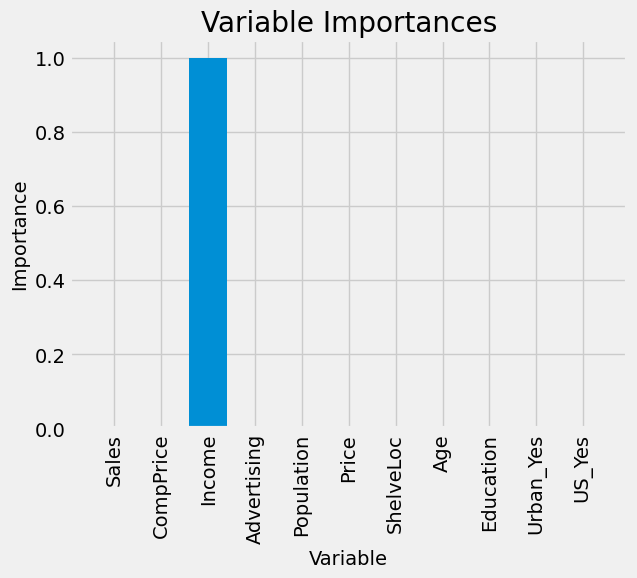

In [33]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


### CONCLUSION

- The analysis focused on a dataset from a cloth manufacturing company comprising approximately 400 records with 10 variables. These variables included attributes such as Sales, Competitor Price, Income, Advertising, Population, Price, Shelf Location, Age, Education, Urban, and US location indicators.
+ To achieve this, a Random Forest model was employed, with Sales as the target variable, and the other attributes as independent variables.
- The importance of variables in predicting sales was visualized.
+ The analysis provides valuable insights into the factors driving high sales for the cloth manufacturing company. Further refinements or alternative models may be explored to optimize predictions and potentially enhance business strategies based on these findings.

### Thank You!